# Automobile Fuel Economy

### Target Variable: Combined MPG (FT 1)

#### Import packages and load in data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('max_columns', None)
%matplotlib inline

In [2]:
fuel_eco = pd.read_csv("C:\\Users\\ahohmann\\Documents\\GitHub\\GA-Data-Science-Final-Project\\database.csv")
fuel_eco.head()

C:\Users\ahohmann\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,22.0,24.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


#### Examine data types

In [3]:
fuel_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
Vehicle ID                             38113 non-null int64
Year                                   38113 non-null int64
Make                                   38113 non-null object
Model                                  38113 non-null object
Class                                  38113 non-null object
Drive                                  36924 non-null object
Transmission                           38102 non-null object
Transmission Descriptor                15045 non-null object
Engine Index                           38113 non-null int64
Engine Descriptor                      22693 non-null object
Engine Cylinders                       37977 non-null float64
Engine Displacement                    37979 non-null float64
Turbocharger                           5239 non-null object
Supercharger                           693 non-null object
Fuel Type                              38

In [4]:
fuel_eco.shape

(38113, 81)

In [5]:
mixed_type_cols = [7, 16, 62, 64, 65, 67, 68, 78]

for i in mixed_type_cols:
    print(fuel_eco.columns[i])

Transmission Descriptor
Fuel Type 2
Start Stop Technology
Electric Motor
Manufacturer Code
Vehicle Charger
Alternate Charger
Range (FT2)


#### Examine categorical data...

In [6]:
fuel_eco.describe(include=['object'])

,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Descriptor,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,Gas Guzzler Tax,My MPG Data,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Vehicle Charger,Alternate Charger,Range (FT2)
count,38113,38113,38113,36924,38102,15045,22693,5239,693,38113,38113,1438,2296,38113,6443,3047,604,7319,48,46,1433
unique,133,3748,34,7,46,52,544,1,1,14,6,4,3,2,2,8,119,45,5,4,210
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,CLKUP,(FFS),T,S,Regular,Regular Gasoline,E85,G,N,N,FFV,288V Ni-MH,GMX,standard charger,80 amp dual charger,290
freq,3810,209,5508,13351,11042,7809,8827,5239,693,25258,26531,1345,1317,25552,4677,1345,117,1084,38,38,74


#### ...and numerical data

In [7]:
fuel_eco.describe()

,Vehicle ID,Year,Engine Index,Engine Cylinders,Engine Displacement,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),City Range (FT2),Highway Range (FT2)
count,38113.000000,38113.000000,38113.000000,37977.000000,37979.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.00000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.0,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000
mean,19170.638496,2000.194527,8799.389001,5.736656,3.317583,17.981109,4.606426,0.546218,0.386633,0.000432,0.205802,0.000828,24.080786,6.131892,0.711437,0.491544,0.000236,0.219221,0.000792,22.653390,33.677988,0.688632,0.972516,20.216068,5.164352,0.60688,0.423415,0.211561,0.000348,0.000812,1970.675360,83.722090,-3101.750059,17.517635,0.218184,64.281794,472.761382,5.276677,17.853074,0.005457,0.004802,-0.926849,13.686905,1.846745,33.770472,6.153858,10.413035,2.028337,0.0,0.027635,0.005549,0.082203,0.080891,0.081311,0.469708,0.426249,0.419197,0.043973,0.040051
std,11134.878665,10.464573,17781.058490,1.752254,1.361995,6.849728,10.113963,4.109282,3.861179,0.039976,3.043951,0.021113,7.026649,12.364612,4.515554,4.120152,0.029477,3.218547,0.020200,9.650185,10.233036,5.682309,6.378065,6.772655,10.849430,4.21010,3.902242,3.113066,0.035210,0.020691,532.555234,440.128132,2664.984809,4.577019,1.143768,156.148536,122.200358,54.964666,94.156241,2.418697,2.417402,0.640151,31.258711,4.426373,45.925292,9.722525,28.141638,5.957147,0.0,0.473685,0.161014,2.156682,2.052187,2.097794,9.352069,9.104702,9.315914,1.311628,1.169281
min,1.000000,1984.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,-23500.000000,0.060000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9529.000000,1991.000000,0.000000,4.000000,2.200000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,27.117400,0.000000,0.0000

#### Let's take a look at vehicle makes

In [8]:
len(fuel_eco.loc[:, 'Make'].value_counts())

133

#### It looks like we're going to have a lot of vehicle Makes that get in our way because their count is so small

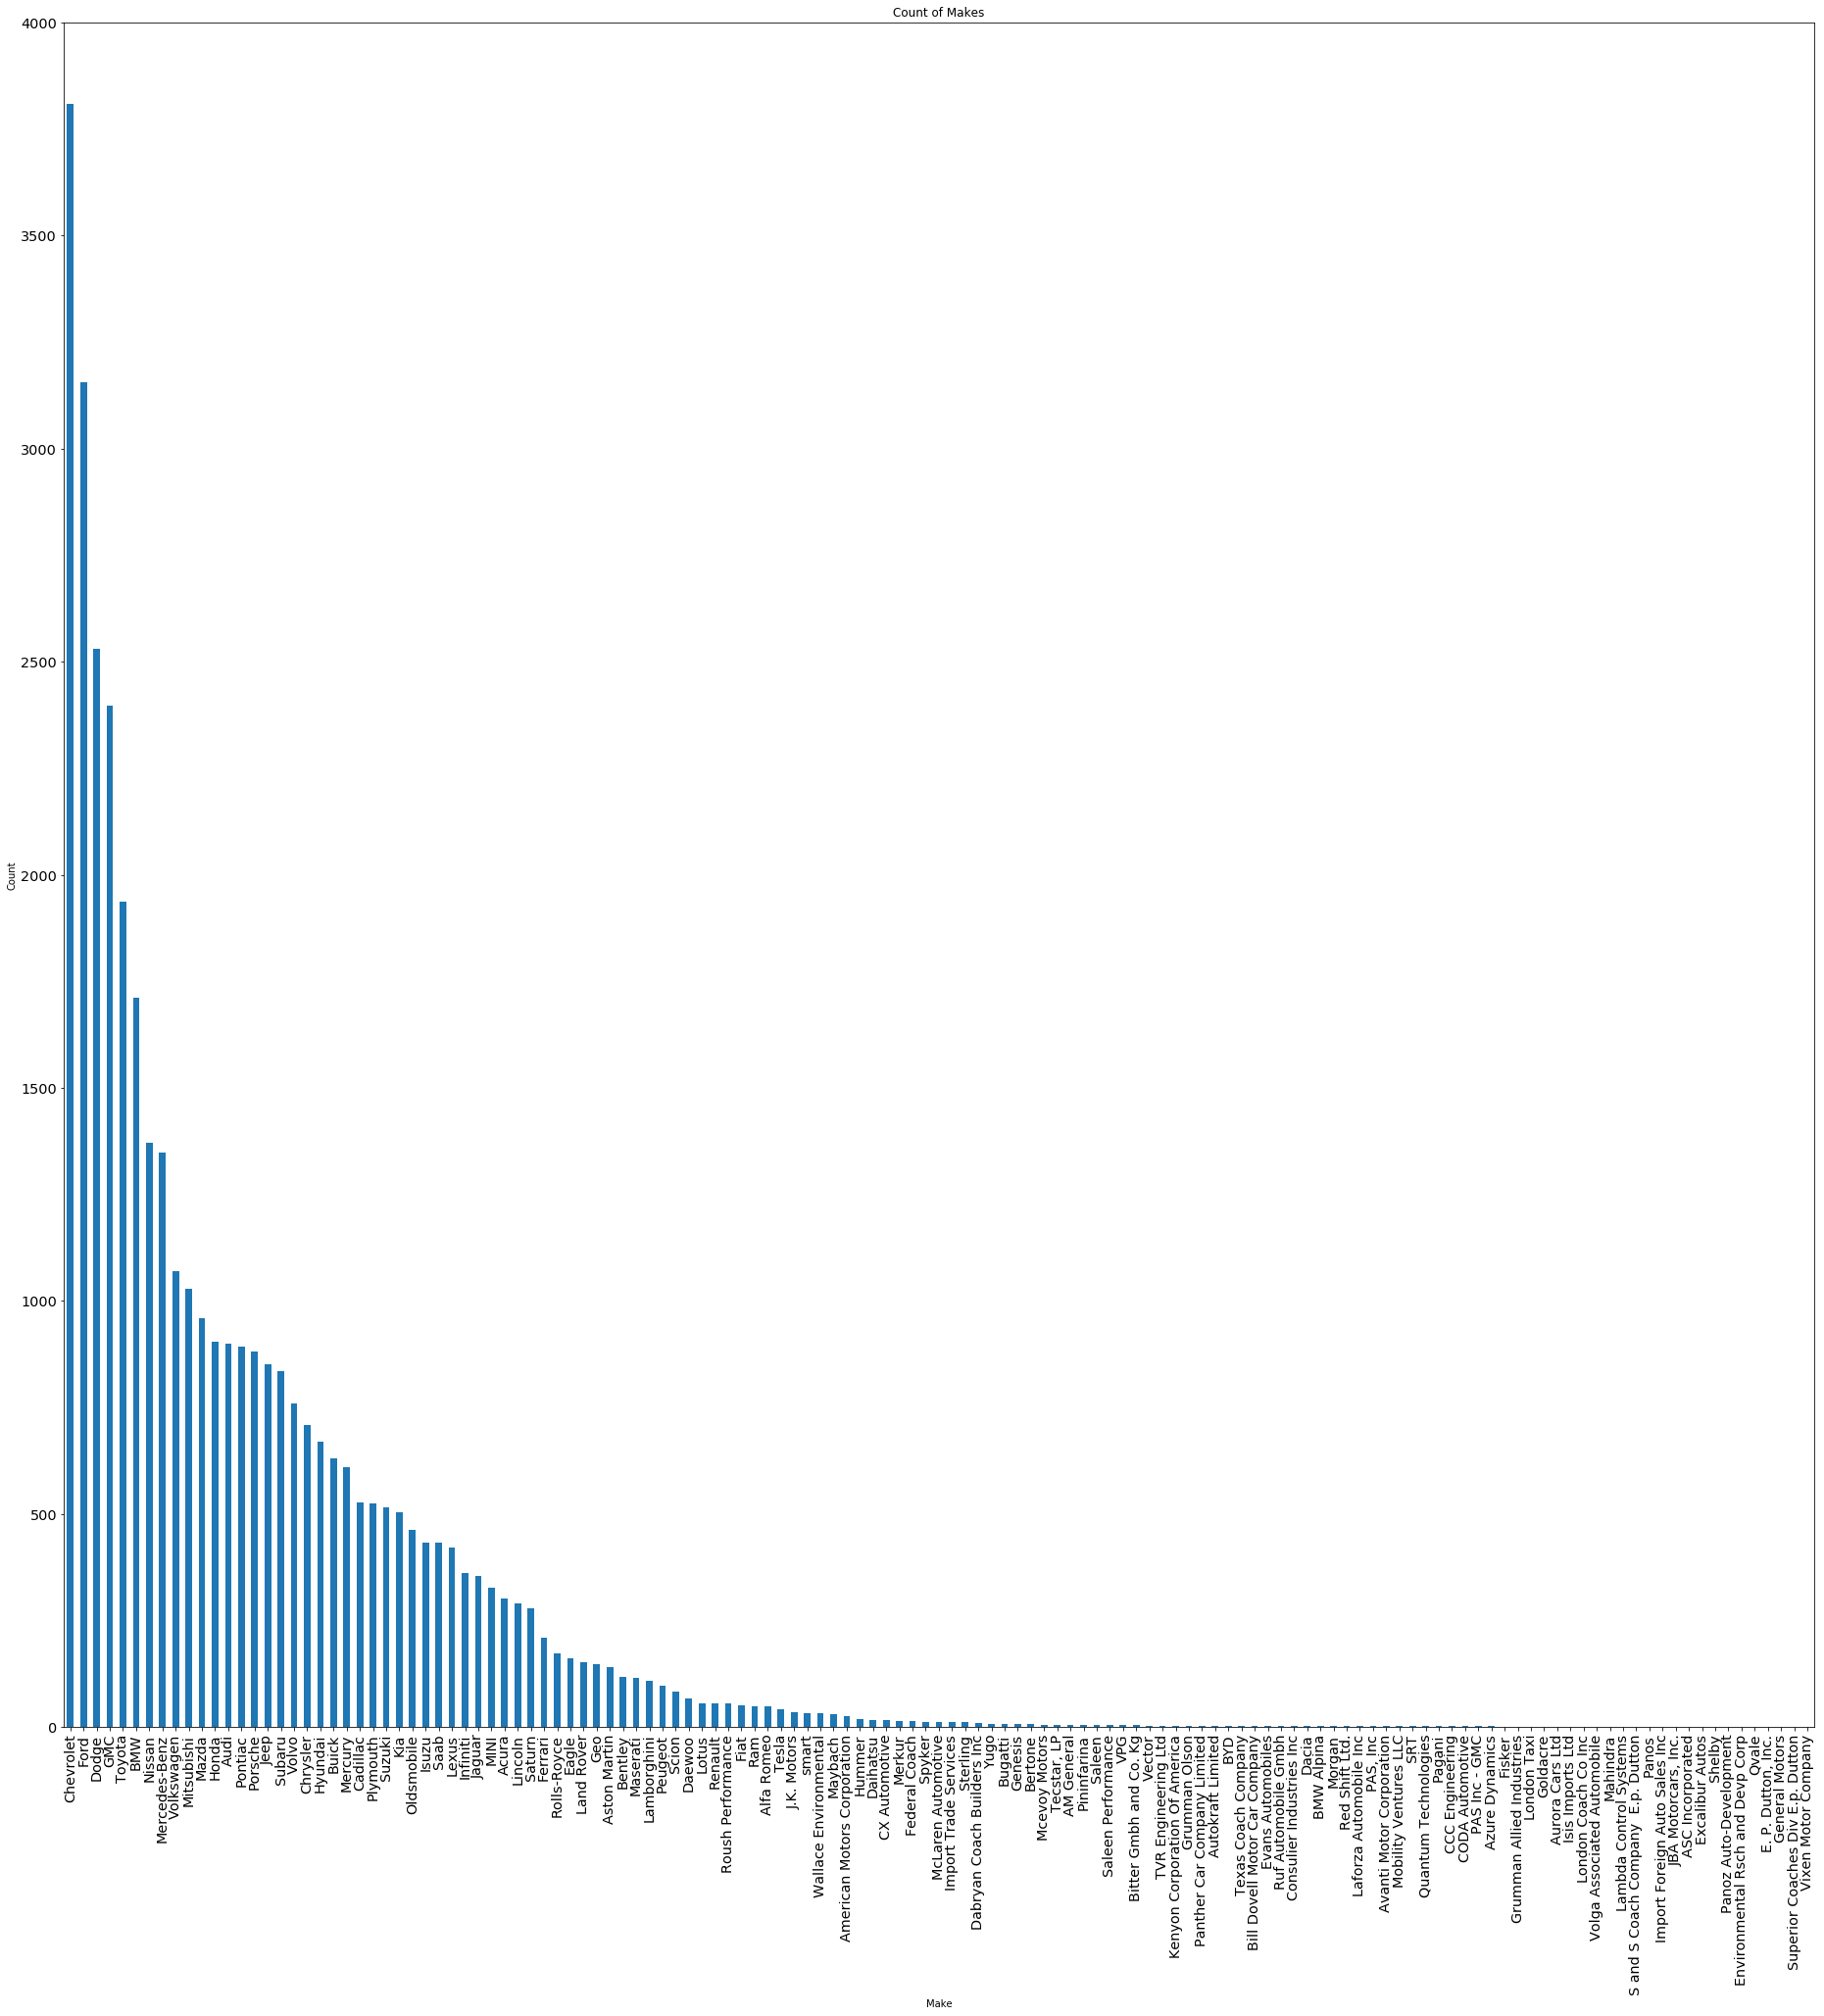

In [9]:
fuel_eco.loc[:, 'Make'].value_counts().plot(kind='bar', figsize=(32,32), fontsize='x-large');
plt.xlabel('Make');
plt.ylabel('Count');
plt.title('Count of Makes');

#### Vehicle year appears to be a lot more manageable

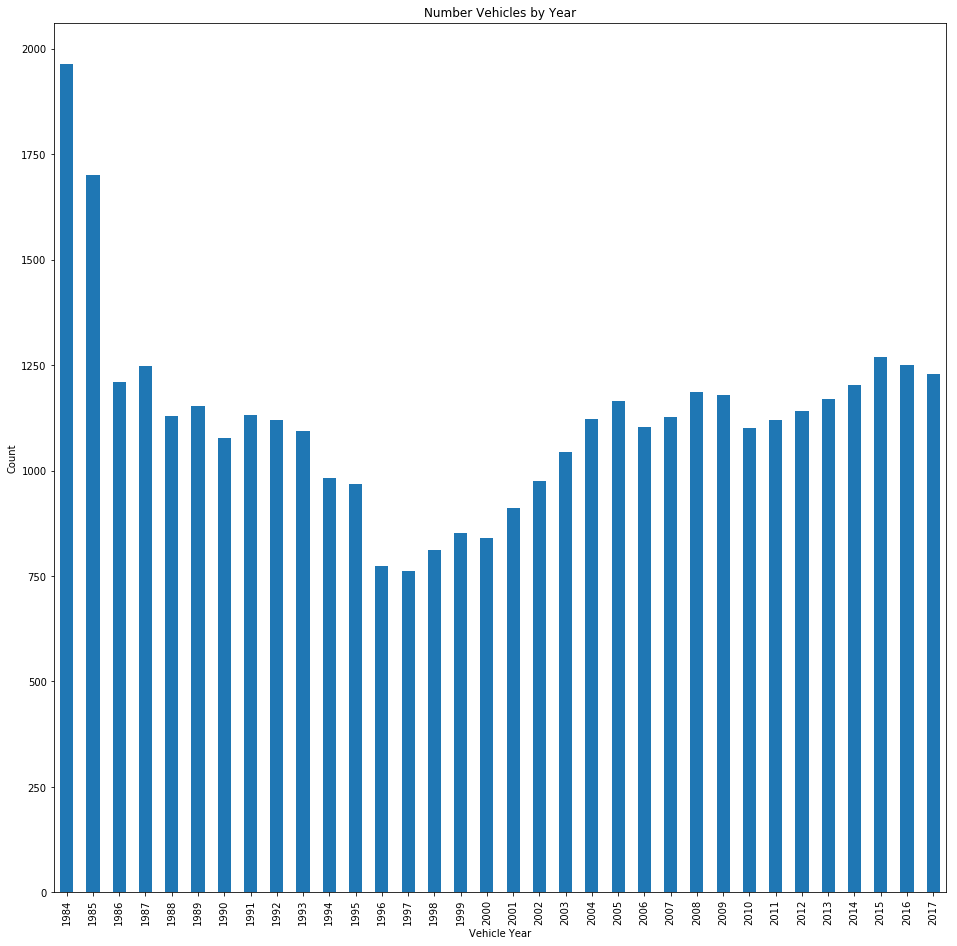

In [10]:
fuel_eco.loc[:,'Year'].value_counts().sort_index().plot(kind='bar', figsize=(16,16));
plt.xlabel('Vehicle Year');
plt.ylabel('Count');
plt.title('Number Vehicles by Year');

#### There are a lot of fuel economy variables. It is important to hone in on one target
#### 'Combined MPG (FT1)' makes sense because it is a function of the other fuel economy variables
#### It is also not missing in most of our rows so we don't need to fill in too many null values

In [11]:
fuel_eco.sort_values(['Combined MPG (FT1)'])

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
5626,2914,1987,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,45,8,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
6810,4141,1988,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,45,8,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
4425,1711,1986,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,45,8,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
9037,6413,1990,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
7943,5267,1989,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,45,8,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
4720,2056,1986,Rolls-Royce,Camargue,Compact Cars,Rear-Wheel Drive,Automatic 3-Speed,NaN,44022,(FFS) (GUZZLER),8.0,6.8,NaN,NaN,Regular,Regular Gasoline,NaN,7,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0

#### Let's rename our target variable to make it easier to work with

In [12]:
fuel_eco.rename(index=str, columns={'Combined MPG (FT1)': 'MPG'}, inplace=True)

fuel_eco.loc[:, 'MPG'].head()

0    20
1    20
2    21
3    21
4    17
Name: MPG, dtype: int64

#### Let's take a look at a numerical column that might be good for a regression analysis

#### there appears to be a correlation between Year and Fuel Economy

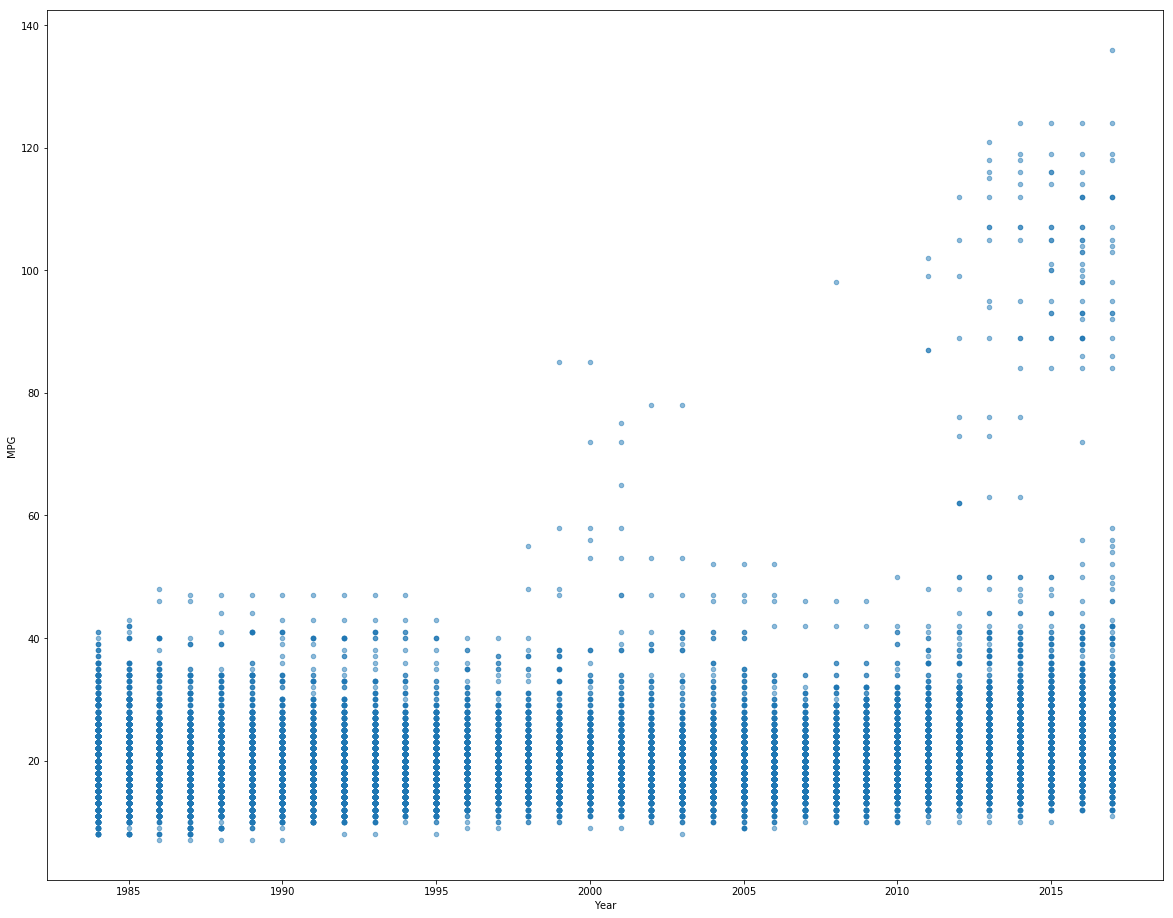

In [13]:
fuel_eco.plot(kind='scatter', x='Year', y='MPG', figsize=(20,16), alpha=.5);

#### How about looking at MPG by Make?

#### Don't forget, some of the counts are so small we are going to have to exclude them from our model

In [14]:
fuel_eco.groupby(['Make'])['MPG'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Tesla,42.0,94.452381,5.264712,86.0,89.00,93.0,98.75,104.0
CODA Automotive,2.0,73.000000,0.000000,73.0,73.00,73.0,73.00,73.0
BYD,4.0,65.000000,4.690416,62.0,62.75,63.0,65.25,72.0
Azure Dynamics,2.0,62.000000,0.000000,62.0,62.00,62.0,62.00,62.0
smart,32.0,56.656250,32.074117,34.0,36.00,36.0,92.00,107.0
Fiat,51.0,37.137255,25.850354,24.0,27.00,29.0,30.00,116.0
Daihatsu,17.0,29.647059,5.086025,20.0,27.00,32.0,34.00,34.0
Grumman Olson,4.0,28.750000,2.629956,26.0,26.75,29.0,31.00,31.0
MINI,327.0,28.379205,4.333837,22.0,27.00,28.0,29.00,98.0


In [15]:
fuel_eco.groupby('Drive',as_index=False)['MPG'].mean()

,Drive,MPG
0,2-Wheel Drive,18.110454
1,4-Wheel Drive,19.158658
2,4-Wheel or All-Wheel Drive,16.747142
3,All-Wheel Drive,21.884960
4,Front-Wheel Drive,24.118118
5,Part-time 4-Wheel Drive,16.414773
6,Rear-Wheel Drive,17.759410


In [16]:
fuel_eco.loc[:, 'Drive'].isnull().sum()

1189

In [17]:
fuel_eco.loc[:,:].isnull().sum().sort_values(ascending=False).head(18)

Alternate Charger                    38067
Vehicle Charger                      38065
Electric Motor                       37509
Supercharger                         37420
Range (FT2)                          36680
Fuel Type 2                          36675
Gas Guzzler Tax                      35817
Alternative Fuel/Technology          35066
Turbocharger                         32874
Start Stop Technology                31670
Manufacturer Code                    30794
Transmission Descriptor              23068
Engine Descriptor                    15420
Drive                                 1189
Engine Cylinders                       136
Engine Displacement                    134
Transmission                            11
Highway Gasoline Consumption (CD)        0
dtype: int64

In [18]:
x = fuel_eco.loc[:,:].isnull().sum().sort_values(ascending=False) > 0
x

Alternate Charger                       True
Vehicle Charger                         True
Electric Motor                          True
Supercharger                            True
Range (FT2)                             True
Fuel Type 2                             True
Gas Guzzler Tax                         True
Alternative Fuel/Technology             True
Turbocharger                            True
Start Stop Technology                   True
Manufacturer Code                       True
Transmission Descriptor                 True
Engine Descriptor                       True
Drive                                   True
Engine Cylinders                        True
Engine Displacement                     True
Transmission                            True
Highway Gasoline Consumption (CD)      False
Unrounded Highway MPG (FT2)            False
Highway MPG (FT2)                      False
Unrounded Highway MPG (FT1)            False
Highway MPG (FT1)                      False
Highway Ra

#### These histograms can help us pick feature columns for our model

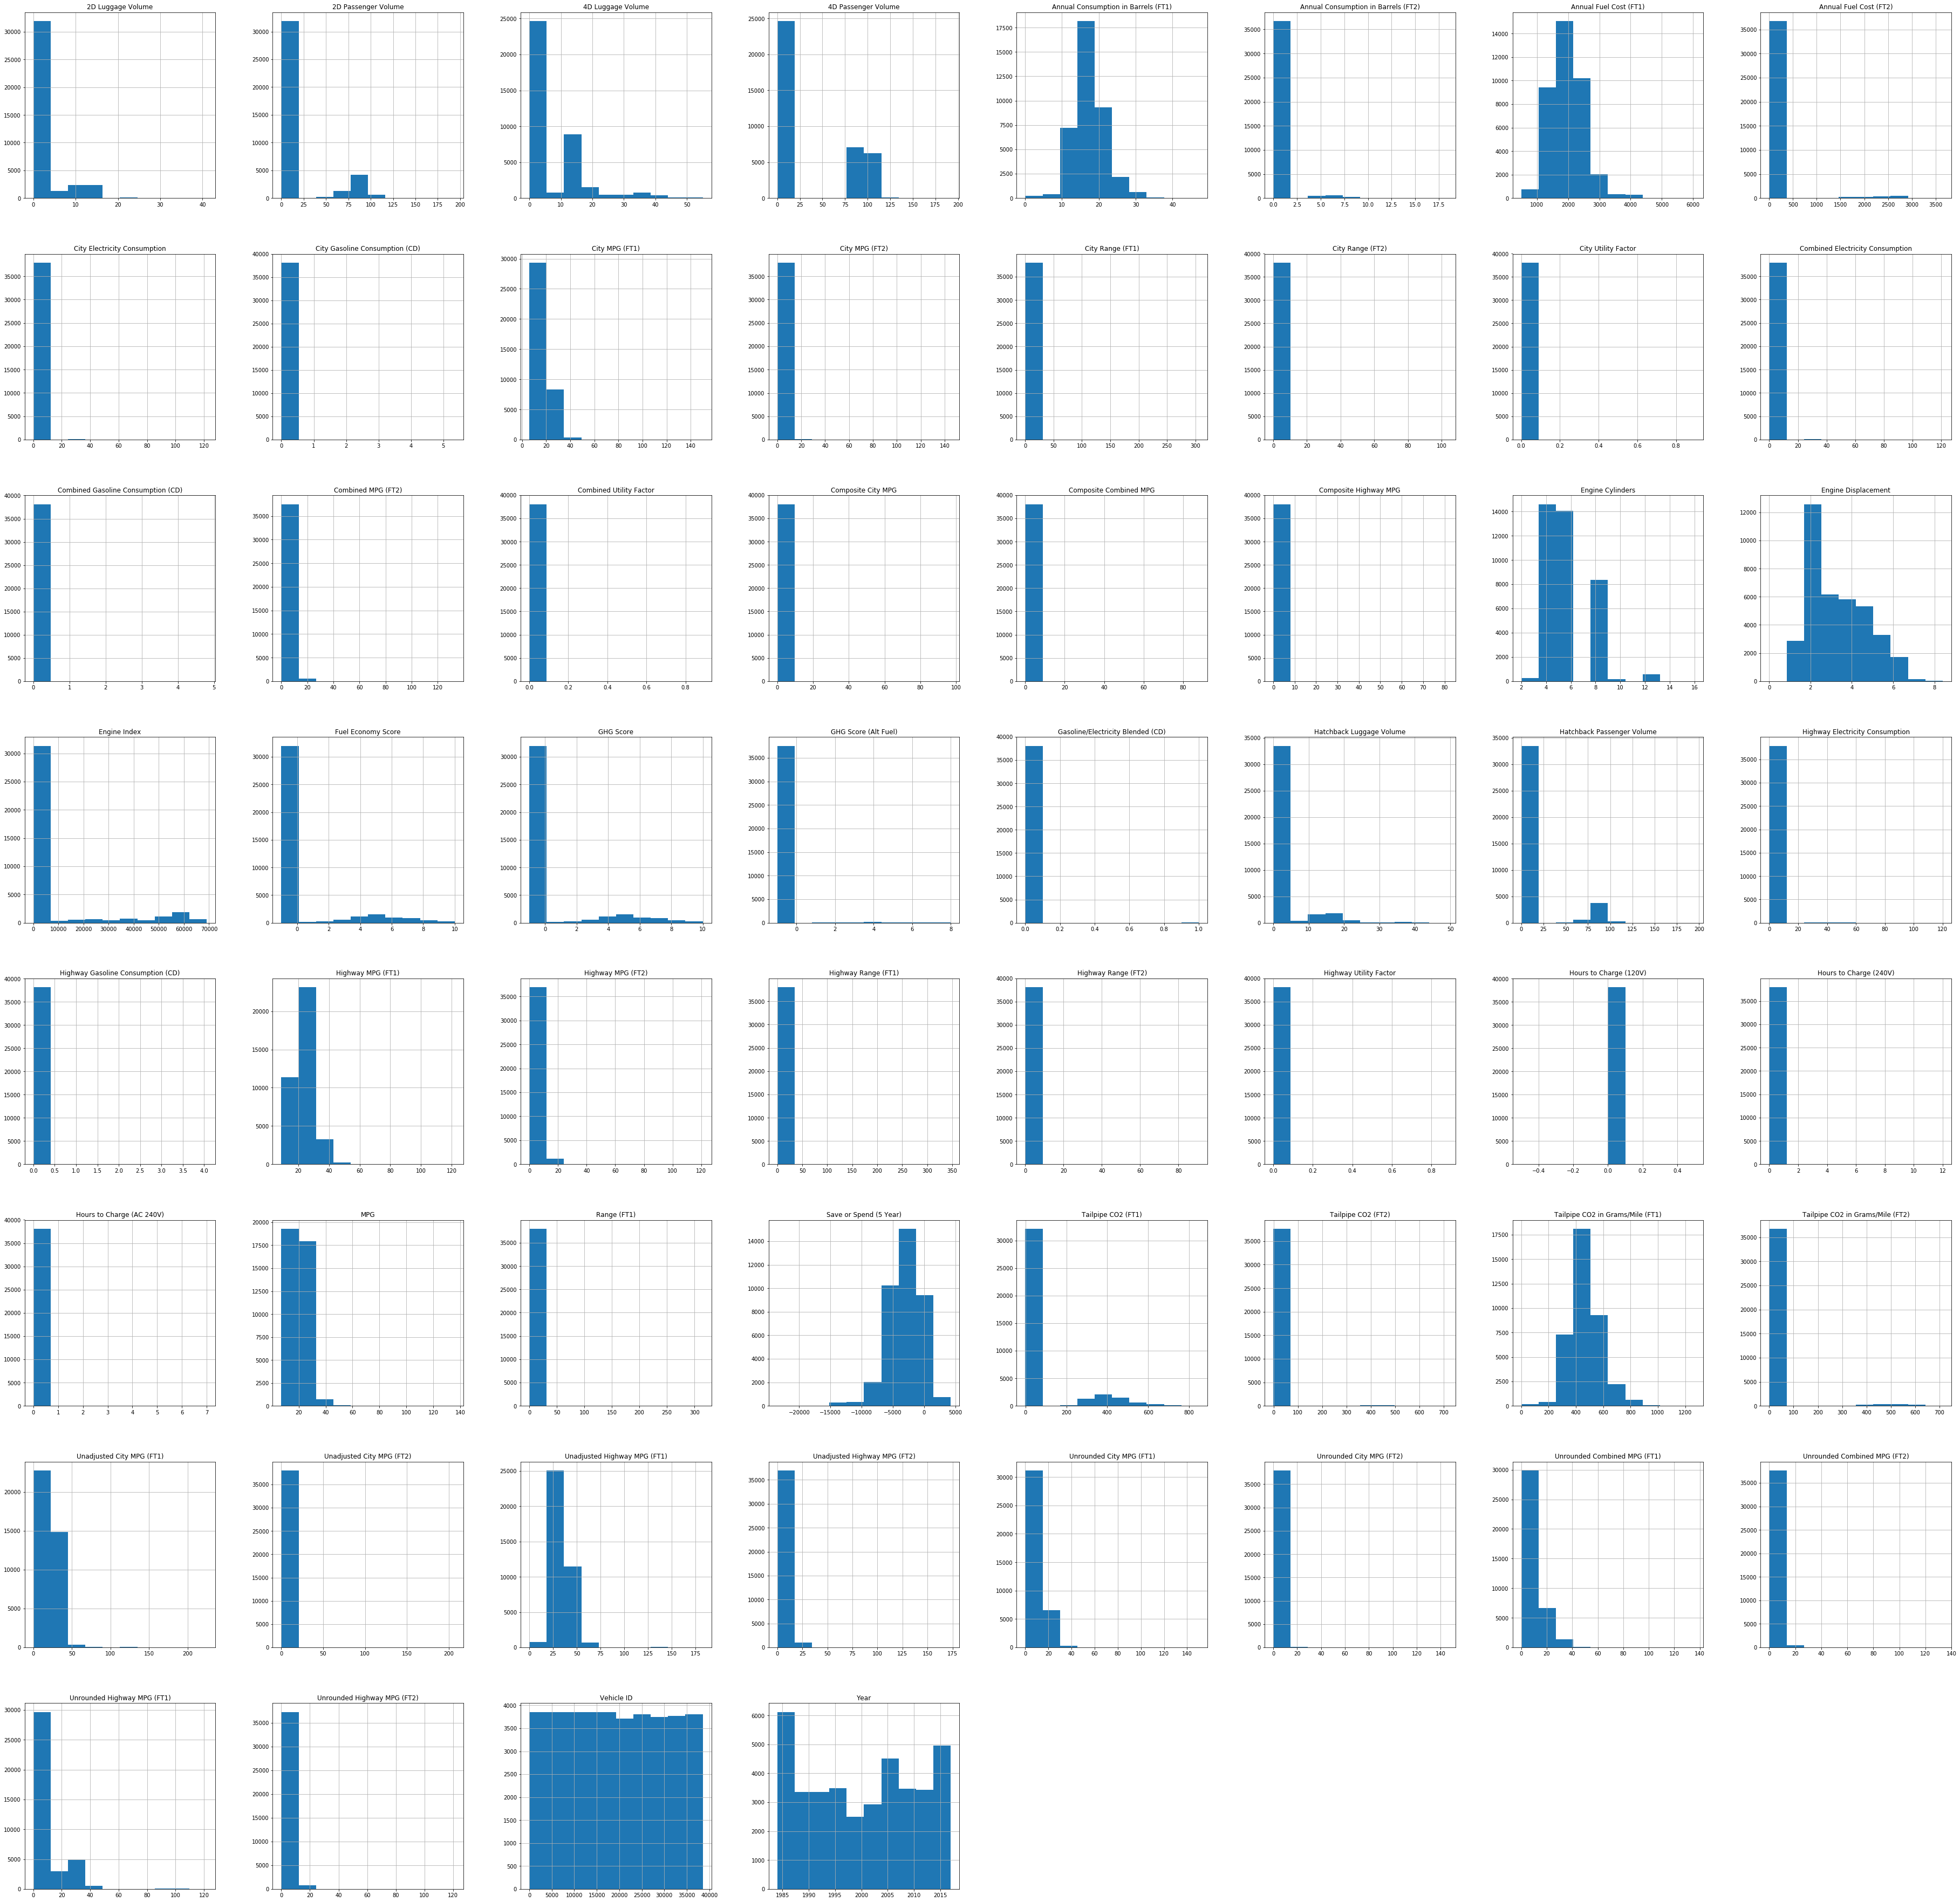

In [19]:
fuel_eco.hist(figsize=(64,64));

#### The heatmap can also help us pick feature columns for our model

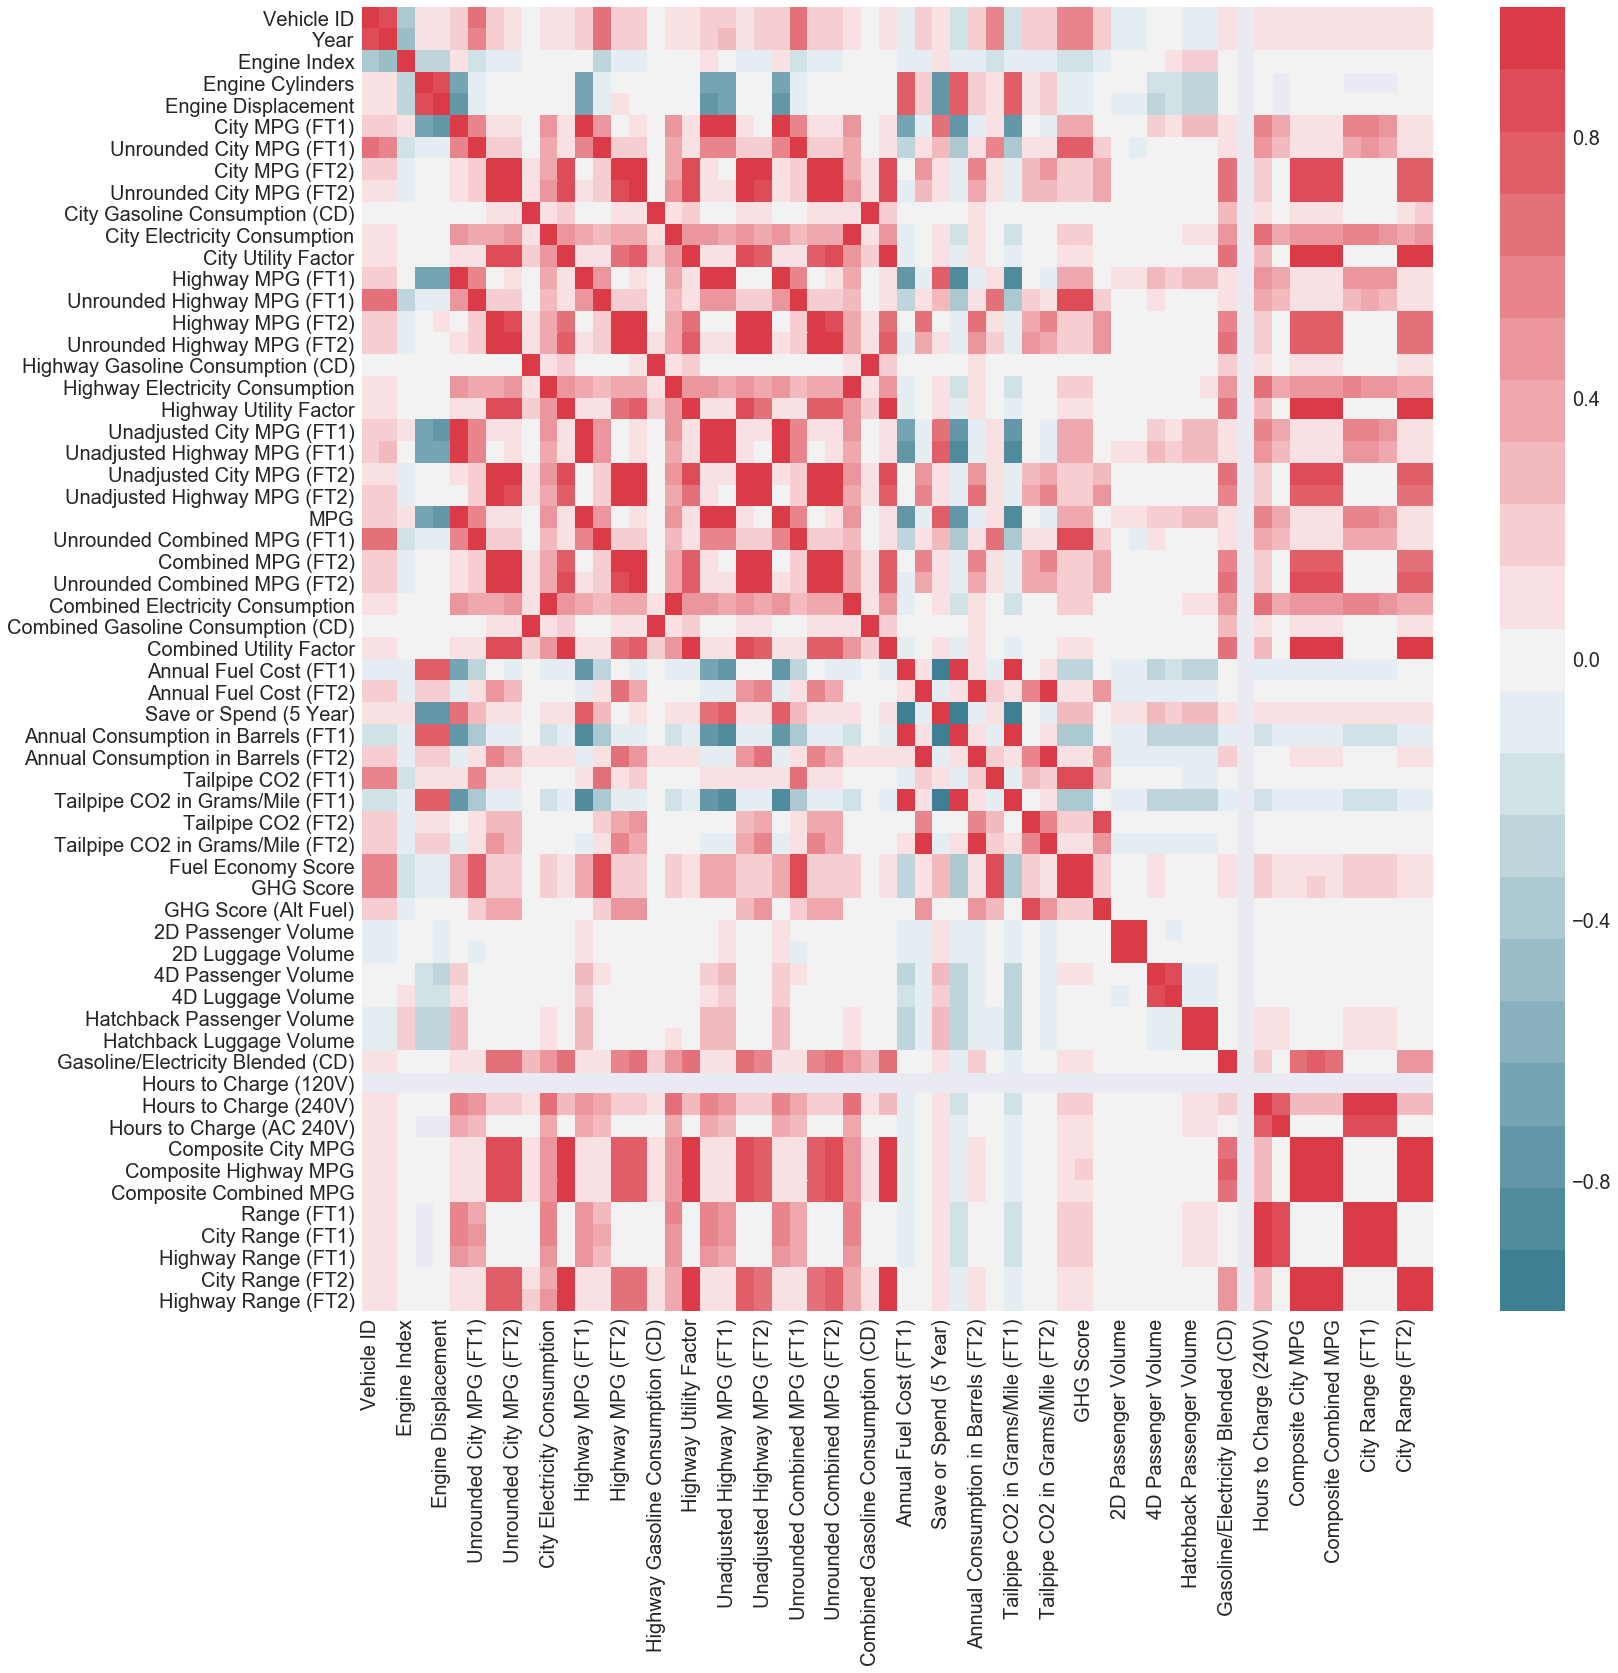

In [20]:
plt.figure(figsize=(24,24))
sns.set(font_scale=2)

sns.heatmap(fuel_eco.corr(),
           vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220,10,n=21),       
           );

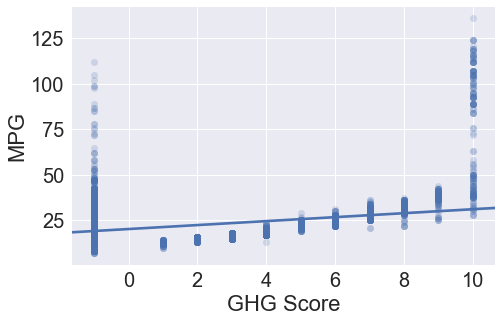

In [21]:
sns.lmplot(x='GHG Score',
           y='MPG',
           data=fuel_eco,
          aspect=1.5,
          scatter_kws={'alpha': 0.2}
          ); 

#### Create new column with dummy variables for Automatic vs. Manual transmission
#### Where Automatic = 1 and Manual = 0

In [22]:
fuel_eco.loc[:, 'Transmission'].str.contains('Man', na=False).value_counts().sum()

38113

In [23]:
fuel_eco.loc[:, 'transmission_type'] = np.where((fuel_eco.loc[:, 'Transmission'].str.contains('Auto', na=False)), 1, 0)

#### Looks good

In [24]:
fuel_eco.loc[:, 'Transmission'].head(15)

0        Manual 5-Speed
1        Manual 5-Speed
2        Manual 5-Speed
3        Manual 5-Speed
4     Automatic 3-Speed
5     Automatic 3-Speed
6     Automatic 3-Speed
7     Automatic 3-Speed
8     Automatic 3-Speed
9     Automatic 3-Speed
10       Manual 4-Speed
11       Manual 4-Speed
12       Manual 4-Speed
13       Manual 4-Speed
14       Manual 5-Speed
Name: Transmission, dtype: object

In [25]:
fuel_eco.loc[:, 'transmission_type'].head(15)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
Name: transmission_type, dtype: int32

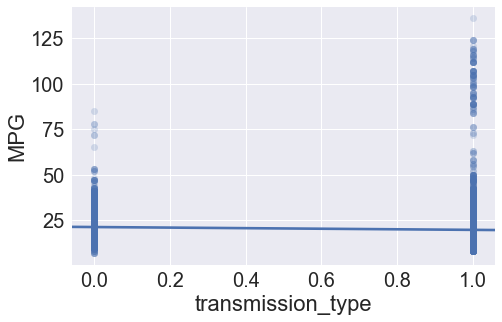

In [26]:
sns.lmplot(x='transmission_type',
           y='MPG',
           data=fuel_eco,
          aspect=1.5,
          scatter_kws={'alpha': 0.2}
          );

#### We could set up dummy values for Fuel type
#### Ideally they should first be combined where logical. But the categories seems pretty jumbled. 
#### E.g. how do you classify "Premium and Electricity" or "Gasoline or Natural Gas"?
#### Let's not use this for our model.

In [27]:
fuel_eco.groupby(['Fuel Type'])['MPG'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Fuel Type,,,,,,,,
Electricity,133.0,92.593985,22.256098,28.0,84.00,95.0,107.00,136.0
Regular Gas or Electricity,2.0,42.000000,0.000000,42.0,42.00,42.0,42.00,42.0
Regular Gas and Electricity,20.0,41.800000,5.934733,32.0,38.00,39.0,47.00,54.0
Premium Gas or Electricity,18.0,31.833333,6.989488,20.0,24.00,34.0,37.00,39.0
Premium and Electricity,25.0,26.600000,5.016639,17.0,25.00,26.0,28.00,39.0
Diesel,1014.0,23.428008,6.859199,14.0,17.00,21.0,28.00,41.0
Regular,25258.0,20.167709,5.279276,8.0,16.00,20.0,23.00,58.0
Premium or E85,122.0,20.000000,3.588319,13.0,18.00,20.0,23.00,27.0
Premium,10133.0,19.345406,4.063903,7.0,17.00,19.0,21.00,44.0


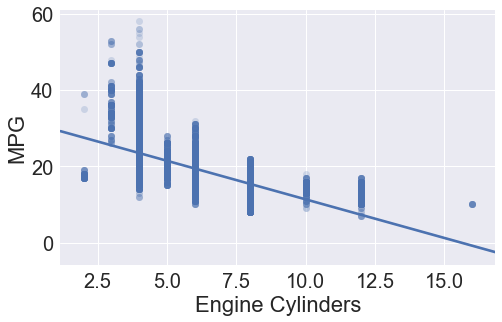

In [28]:
sns.lmplot(x='Engine Cylinders',
           y='MPG',
           data=fuel_eco,
          aspect=1.5,
          scatter_kws={'alpha': 0.2}
          );

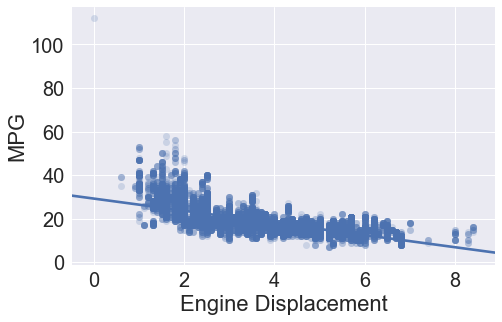

In [29]:
sns.lmplot(x='Engine Displacement',
           y='MPG',
           data=fuel_eco,
          aspect=1.5,
          scatter_kws={'alpha': 0.2}
          );

#### Class seems like it has some of the same issues as our Fuel Type.
#### For the sake of experimentation, let's try using it anyway.

In [30]:
fuel_eco.groupby(['Class'])['MPG'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Small Sport Utility Vehicle 2WD,403.0,24.332506,5.867832,18.0,22.00,24.0,26.00,76.0
Small Station Wagons,1499.0,24.214810,6.739420,14.0,21.00,24.0,26.00,119.0
Compact Cars,5508.0,23.437001,5.795673,8.0,20.00,23.0,26.00,116.0
Subcompact Cars,4872.0,22.910099,7.360621,8.0,19.00,22.0,26.00,124.0
Small Sport Utility Vehicle 4WD,526.0,22.323194,3.044764,16.0,20.00,22.0,24.00,33.0
Special Purpose Vehicle,1.0,22.000000,NaN,22.0,22.00,22.0,22.00,22.0
Midsize Cars,4395.0,21.748578,6.918032,8.0,19.00,21.0,23.00,136.0
Minicompact Cars,1260.0,21.484127,8.398754,11.0,18.00,20.0,23.00,121.0
Midsize Station Wagons,523.0,21.105163,4.364875,14.0,19.00,20.0,22.00,85.0


#### Clean up null values before proceeding.
#### After examing these null values, let's drop them.

In [31]:
len((fuel_eco.loc[fuel_eco.loc[:, 'Engine Displacement'].isnull(), :]))

134

In [32]:
len((fuel_eco.loc[fuel_eco.loc[:, 'Engine Cylinders'].isnull(), :]))

136

#### there is a strong overlap between null values for 'Engine Displacement' and 'Engine Cylinders'

In [33]:
len(fuel_eco.loc[(fuel_eco.loc[:, 'Engine Displacement'].isnull()) & (fuel_eco.loc[:, 'Engine Cylinders'].isnull()), :])

134

#### but there does not seem to be any other commonalities between the two. Dropping these values

In [34]:
fuel_eco.loc[(fuel_eco.loc[:, 'Engine Displacement'].isnull()) & (fuel_eco.loc[:, 'Engine Cylinders'].isnull()), :]

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),MPG,Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2),transmission_type
3524,29472,1985,Subaru,RX Turbo,Subcompact Cars,4-Wheel Drive,Manual 5-Speed,NaN,0,NaN,NaN,NaN,T,NaN,Regular,Regular Gasoline,NaN,22,0.0000,0,0.0,0.0,0.0000,0.0,28,0.0000,0,0.0,0.0,0.0000,0.0,27.4000,38.8000,0.0,0.0,24,0.0000,0,0.0,0.0000,0.0,0.0,1450,0,NaN,-500,13.73375,0.0,-1,370.291667,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0,0
3525,29473,1985,Subaru,RX Turbo,Subcompact Cars,4-Wheel Drive,Manual 5-Speed,NaN,0,CA model,NaN,NaN,T,NaN,Regular,Regular Gasoline,NaN,21,0.0000,0,0.0,0.0,0.0000,0.0,27,0.0000,0,0.0,0.0,0.0000,0.0,26.9000,37.1000,0.0,0.0,23,0.0000,0,0.0,0.0000,0.0,0.0,1500,0,NaN,-750,14.33087,0.0,-1,386.391304,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0,0
16448,30976,1998,Chevrolet,S10 Electric,Small Pickup Trucks 2WD,2-Wheel Drive,Automatic (A1),NaN,0,Lead Acid,NaN,NaN,NaN,NaN,Electricity,Electricity,NaN,52,0.0000,0,0.0,0.0,64.0000,0.0,58,0.0000,0,0.0,0.0,59.0000,0.0,74.8889,82.1951,0.0,0.0,55,0.0000,0,0.0,62.0000,0.0,0.0,1200,0,NaN,750,0.37200,0.0,0,0.000000,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,N,EV,85 kW AC Induction,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,33,0.0000,0.0000,NaN,0.0,0.0,1
16449,30977,1998,Chevrolet,S10 Electric,Small Pickup Trucks 2WD,2-Wheel Drive,Automatic (A1),NaN,0,NiMH,NaN,NaN,NaN,NaN,Electricity,Electricity,NaN,28,0.0000,0,0.0,0.0,122.0000,0.0,28,0.0000,0,0.0,0.0,120.0000,0.0,35.8511,39.1860,0.0,0.0,28,0.0000,0,0.0,121.0000,0.0,0.0,2350,0,NaN,-5000,0.72600,0.0,0,0.000000,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,N,EV,85 kW AC Induction,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,72,0.0000,0.0000,NaN,0.0,0.0,1
16711,30975,1998,Honda,EV Plus,Compact Cars,NaN,Automatic (A1),NaN,0,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,NaN,49,0.0000,0,0.0,0.0,69.0000,0.0,46,0.0000,0,0.0,0.0,73.0000,0.0,68.7755,66.0784,0.0,0.0,48,0.0000,0,0.0,71.0000,0.0,0.0,1400,0,NaN,-250,0.42600,0.0,0,0.000000,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,N,EV,49 kW DC Brushless,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,81,0.0000,0.0000,NaN,0.0,0.0,1
17323,30973,1999,Dodge,Caravan/Grand Caravan 2WD,Minivan - 2WD,2-Wheel Drive,Automatic (A1),NaN,0,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,NaN,37,0.0000,0,0.0,0.0,90.0000,0.0,33,0.0000,0,0.0,0.0,103.0000,0.0,50.2985,46.1644,0.0,0.0,35,0.0000,0,0.0,96.0000,0

In [35]:
fuel_eco = fuel_eco.loc[fuel_eco.loc[:, 'Engine Cylinders'].notnull(), :]

#### Looks good, successfully dropped nulls

In [36]:
fuel_eco.loc[(fuel_eco.loc[:, 'Engine Displacement'].isnull()) & (fuel_eco.loc[:, 'Engine Cylinders'].isnull()), :]

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),MPG,Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2),transmission_type


### Time to build our regression model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

#### Let's try with just one feature column first

In [38]:
# feature_cols = ['Engine Displacement']
feature_cols = ['Year']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'MPG']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

In [41]:
y_pred

array([ 21.03225879,  19.25602904,  19.25602904, ...,  21.2860059 ,
        20.1864351 ,  20.35559984])

#### check root mean squared error (RMSE) of null prediction for baselining of model

In [42]:
null_pred = y - np.mean(y)
null_rmse = np.sqrt(metrics.mean_squared_error(null_pred, y))
print(null_rmse)

19.9624772889


#### RMSE of y_pred using our feature columns is very small compared to null model.
#### current feature column is just Engine Displacement
#### let's test with other feature columns

In [43]:
y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

4.93151281036


#### Adding 'Year' as a feature improved model performance

In [44]:
feature_cols = ['Year', 'Engine Displacement']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.30422314163


#### RMSE is about same
#### thinking logically, there's possibility of colinearity between displacement and cylinders

In [45]:
feature_cols = ['Year', 'Engine Displacement', 'Engine Cylinders']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.17503818535


#### RMSE is about the same with addition of transmission_type.

In [46]:
feature_cols = ['Year', 'Engine Displacement', 'Engine Cylinders', 'transmission_type']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.13722297475


#### RMSE is lower with addition of GHG Score

In [47]:
feature_cols = ['Year', 'Engine Displacement', 'Engine Cylinders', 'transmission_type', 'GHG Score']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.00653247587


#### Let's try adding in dummy variables

In [48]:
make_dummies = pd.get_dummies(fuel_eco, columns=['Make'])

#### there are a lot of dummy variables
#### to make it easier to add them to our feature columns, let's create a list of them pythonically

In [49]:
makes = np.unique(fuel_eco.loc[:, 'Make'].values)
makes = makes.tolist()
type(makes)

list

In [50]:
make_feats = [] 

for make in makes:
    make_feats.append("Make_"+make)
    
make_feats

['Make_AM General',
 'Make_ASC Incorporated',
 'Make_Acura',
 'Make_Alfa Romeo',
 'Make_American Motors Corporation',
 'Make_Aston Martin',
 'Make_Audi',
 'Make_Aurora Cars Ltd',
 'Make_Autokraft Limited',
 'Make_Avanti Motor Corporation',
 'Make_BMW',
 'Make_BMW Alpina',
 'Make_Bentley',
 'Make_Bertone',
 'Make_Bill Dovell Motor Car Company',
 'Make_Bitter Gmbh and Co. Kg',
 'Make_Bugatti',
 'Make_Buick',
 'Make_CCC Engineering',
 'Make_CX Automotive',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Chrysler',
 'Make_Consulier Industries Inc',
 'Make_Dabryan Coach Builders Inc',
 'Make_Dacia',
 'Make_Daewoo',
 'Make_Daihatsu',
 'Make_Dodge',
 'Make_E. P. Dutton, Inc.',
 'Make_Eagle',
 'Make_Environmental Rsch and Devp Corp',
 'Make_Evans Automobiles',
 'Make_Excalibur Autos',
 'Make_Federal Coach',
 'Make_Ferrari',
 'Make_Fiat',
 'Make_Fisker',
 'Make_Ford',
 'Make_GMC',
 'Make_General Motors',
 'Make_Genesis',
 'Make_Geo',
 'Make_Goldacre',
 'Make_Grumman Allied Industries',
 'Make_Grumm

In [51]:
features = ['Year', 'Engine Displacement', 'Engine Cylinders', 'transmission_type', 'GHG Score']

In [52]:
feature_cols = [features + make_feats]
feature_cols = feature_cols[0]
len(feature_cols)

134

#### Now that we added dummy variables to our feature columns, let's try the model

#### using dummy values of Make in addition to our previous feature columns we get our best RMSE yet

In [53]:
X = make_dummies.loc[:, feature_cols]
y = make_dummies.loc[:, 'MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

2.86298132407


#### But, remember there are Makes with only one instance? 

#### 105 of them actually. We are surely overfitting!

In [54]:
(fuel_eco.loc[:, 'Make'].value_counts() <2).value_counts()

False    105
True      24
Name: Make, dtype: int64

#### to avoid overfitting, let's try a "large" number
#### there are now 72 Makes with less than 30 instances, let's not dummy them

In [55]:
(fuel_eco.loc[:, 'Make'].value_counts() <30).value_counts()

True     72
False    57
Name: Make, dtype: int64

#### make a list of "large number" makes

In [56]:
drop_dums = fuel_eco.loc[:, 'Make'].value_counts()
drop_dums = dict(drop_dums[drop_dums < 30])
drop_dums = list(drop_dums.keys())
len(drop_dums)

72

#### update the list name to reflect our dummy columns format so we can drop them

In [57]:
drop_dum_feats = []

for make in drop_dums:
    drop_dum_feats.append("Make_"+make)

len(drop_dum_feats)

72

#### Drop the dummy columns from our DataFrame

In [58]:
make_dummies.drop(drop_dum_feats, axis=1, inplace=True)
make_dummies

,Vehicle ID,Year,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),MPG,Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2),transmission_type,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Daewoo,Make_Dodge,Make_Eagle,Make_Ferrari,Make_Fiat,Make_Ford,Make_GMC,Make_Geo,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Isuzu,Make_J.K. Motors,Make_Jaguar,Make_Jeep,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_MINI,Make_Maserati,Make_Maybach,Make_Mazda,Make_Mercedes-Benz,Make_Mercury,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Peugeot,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Ram,Make_Renault,Make_Rolls-Royce,Make_Roush Performance,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_Wallace Environmental
0,26587,1984,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0000,0,0.0000,0.0000,0.0,0.000,24,0.0000,0,0.00,0.0000,0.0,0.00,21.0000,34.0000,0.0,0.0,20,0.0000,0,0.0000,0.0,0.0000,0.000,1750,0,NaN,-2000,16.480500,0.000000,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27705,1984,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0000,0,0.0000,0.0000,0.0,0.000,24,0.0000,0,0.00,0.0000,0.0,0.00,21.0000,34.0000,0.0,0.0,20,0.0000,0,0.0000,0.0,0.0000,0.000,1750,0,NaN,-2000,16.480500,0.000000,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26561,1984,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0000,0.0000,0.0,0.000,25,0.0000,0,0.00,0.0000,0.0,0.00,23.0000,35.0000,0.0,0.0,21,0.0000,0,0.0000,0.0,0.0000,0.000,1650,0,NaN,-1500,15.695714,0.000000,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27681,1984,Spider Veloc

#### create a new list of feature columns with our small number dummies removed

In [59]:
new_feature_cols = [make for make in feature_cols if make not in drop_dum_feats]
len(new_feature_cols)

62

#### Now try running the model again with new_feature_cols
#### RMSE still looks good

In [60]:
X = make_dummies.loc[:, new_feature_cols]
y = make_dummies.loc[:, 'MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

2.84043794803


#### Now that we have our model, let's use it to make predictions
#### and add the predictions to our data frame

In [61]:
make_dummies.loc[:, 'predictions'] = LR.predict(X)

#### Now plot it and compare predicted values to actual

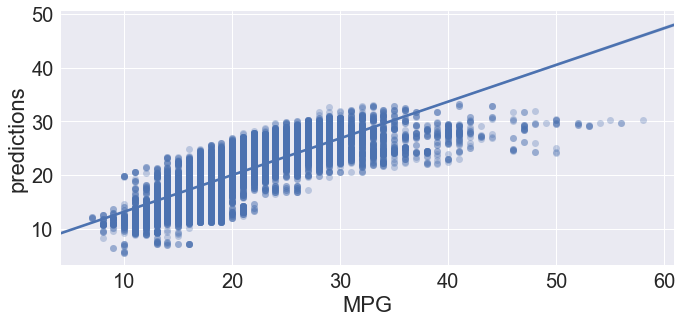

In [62]:
sns.lmplot(x='MPG',
          y='predictions',
          data=make_dummies,
          aspect=2,
          scatter_kws={'alpha':0.3}
          );

#### Let's look at our intercept and coefficients 

In [63]:
print(LR.intercept_)
sorted(list(zip(LR.coef_,new_feature_cols)))

-89.8504394066


[(-3.9181018981898084, 'Make_Maserati'),
 (-3.4829891643221016, 'Make_J.K. Motors'),
 (-2.5451634641186485, 'Make_Ferrari'),
 (-2.3609896758781184, 'Make_Land Rover'),
 (-2.2925098529363246, 'Engine Displacement'),
 (-1.5888488907960809, 'Make_Lotus'),
 (-1.5172074038851688, 'Make_Peugeot'),
 (-1.4359701009143806, 'Make_Saab'),
 (-1.213071352373934, 'Make_Wallace Environmental'),
 (-1.0215578135784127, 'Make_Alfa Romeo'),
 (-0.90421925909937284, 'Make_Jeep'),
 (-0.82577532201556825, 'Make_Isuzu'),
 (-0.75156961971636127, 'transmission_type'),
 (-0.66093579249716927, 'Make_Audi'),
 (-0.62579853286006548, 'Make_Volvo'),
 (-0.60857683191357981, 'Make_Aston Martin'),
 (-0.52659393605783222, 'Make_Lamborghini'),
 (-0.26710597486237053, 'Engine Cylinders'),
 (-0.2377858704264002, 'Make_Roush Performance'),
 (-0.20715853684890759, 'Make_Ram'),
 (-0.030182728337252274, 'Make_BMW'),
 (0.012580693051202248, 'Make_Mitsubishi'),
 (0.059359208578327639, 'Year'),
 (0.072188047888224305, 'Make_Porsch

#### Fit all and take a look at the intercept and coefficients

In [64]:
X = make_dummies.loc[:, new_feature_cols]
y = make_dummies.loc[:, 'MPG']

LR_all = LinearRegression()
LR_all.fit(X, y)

print(LR_all.intercept_)
sorted(list(zip(LR_all.coef_,new_feature_cols)))

-92.5175942327


[(-4.0382188635545582, 'Make_Maserati'),
 (-3.6697167079488744, 'Make_J.K. Motors'),
 (-2.5902411832728922, 'Make_Land Rover'),
 (-2.5322642848521344, 'Make_Ferrari'),
 (-2.3239328615419192, 'Engine Displacement'),
 (-1.6445676103995415, 'Make_Wallace Environmental'),
 (-1.6096569102723721, 'Make_Peugeot'),
 (-1.5857030785790265, 'Make_Saab'),
 (-1.5422892217954078, 'Make_Lotus'),
 (-1.1956306021996579, 'Make_Isuzu'),
 (-1.1006841239714049, 'Make_Alfa Romeo'),
 (-1.0487975519333785, 'Make_Jeep'),
 (-0.87522664855831767, 'Make_Volvo'),
 (-0.82589463925677142, 'Make_Audi'),
 (-0.73137189628613641, 'transmission_type'),
 (-0.72219422428533331, 'Make_Aston Martin'),
 (-0.69195019785577783, 'Make_Lamborghini'),
 (-0.49104554387598587, 'Make_Roush Performance'),
 (-0.42058846702521047, 'Make_Ram'),
 (-0.25664931174518957, 'Engine Cylinders'),
 (-0.20792457653953761, 'Make_BMW'),
 (-0.16642870206048516, 'Make_Mitsubishi'),
 (-0.10657885156044244, 'Make_Porsche'),
 (-0.039966315445480682, 'Mak

#### If you ask our regression model, it sure sucks to be a Maserati

#### ...and it's great to be a Geo

In [65]:
print(sorted(list(zip(LR_all.coef_,new_feature_cols)))[0])

last = (len(sorted(list(zip(LR_all.coef_,new_feature_cols))))) - 1
print(sorted(list(zip(LR_all.coef_,new_feature_cols)))[last])

(-4.0382188635545582, 'Make_Maserati')
(4.1709140787565495, 'Make_Geo')


#### Fin